# Results of different #agent values

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

In [18]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,10.0,2.0,5.0,116.770696,116.770696,0.035450,1959.724724,50.0
1,IterativeAssignmentPlanner,100,10.0,2.0,5.0,131.339478,131.339478,0.126311,5079.938996,100.0
2,IterativeAssignmentPlanner,200,10.0,2.0,5.0,166.620219,166.620219,0.471056,12812.733521,200.0
3,IterativeAssignmentPlanner,300,10.0,2.0,5.0,203.790126,203.790126,1.031426,22642.191358,300.0
4,IterativeAssignmentPlanner,400,10.0,2.0,5.0,230.887050,230.887050,1.820630,34267.022912,400.0


In [19]:
planners_names = ['StaticLinePlanner', 'TravelingLinePlanner','SeparateTravelingPlanner','IterativeAssignmentPlanner',
                  'ClusteringAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

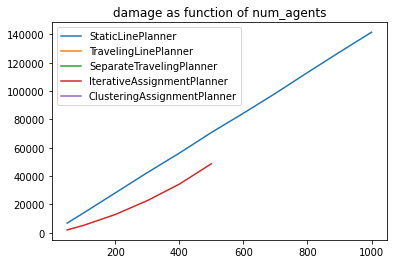

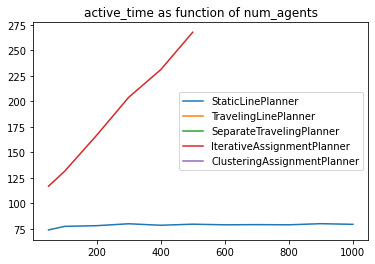

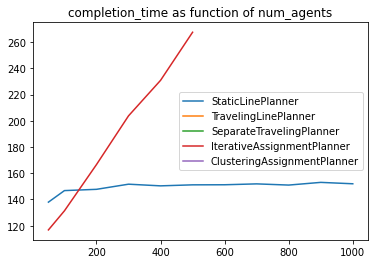

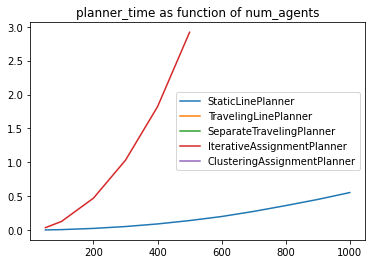

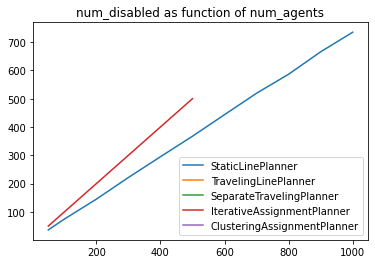

In [33]:
Y = ['damage', 'active_time', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]
    
    title = f'{y} as function of {x}'
    plt.title(title)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    # plt.figure(figsize=(10, 8))
    # plt.savefig('./plots/'+title+'.png')

    plt.legend(planners_names)
    plt.show()